# **Project Name**    - 



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1**  - SAI NARASIMHA CHARAN THULASI


# **Project Summary -**

The entertainment industry is highly competitive, and success is dependent on various factors, including genre, rating, production budget, cast, and more. In this context, a study was conducted to understand the factors influencing the popularity of movies and TV shows on Netflix. The study used a dataset containing around 12 variables to cluster the movies and TV shows based on their popularity and audience preferences. The first step in the analysis involved data wrangling, where missing values were handled, and unique values were checked. The study identified that there were 2389 missing values for the 'director' column, 718 for the 'cast' column, 507 for the 'country' column, and 10 for the 'date_added' column. These missing values were removed by dropping the corresponding rows.

Next, the study performed exploratory data analysis (EDA). The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform. The most common rating for TV shows is TV-MA, indicating that a significant portion of the TV shows available on Netflix are intended for adult audiences. Additionally, TV-MA is the most common rating for both movies and TV shows, suggesting that Netflix's content caters to a primarily adult demographic, with a focus on mature and potentially controversial themes. The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases. The growth rate of movie releases on Netflix is significantly faster than that of TV shows. Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix. However, there has been a notable drop in the number of movies and TV show episodes produced after 2020. It appears that Netflix has given more attention to increasing its movie content rather than TV shows.

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform. Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix.

To cluster the shows, the study focused on six key attributes: director, cast, country, genre, rating, and description. These attributes were transformed into a 10,000-feature TFIDF vectorization, and Principal Component Analysis (PCA) was used to reduce the components to 3000, capturing more than 80% of the variance. Next, two clustering algorithms, K-Means and Agglomerative clustering, were used to group the shows. K-Means determined that the optimal number of clusters was 5, while Agglomerative clustering suggested 7 clusters, which were visualized using a dendrogram.

Finally, a content-based recommender system was created using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore. In summary, the study identified key trends in the Netflix dataset, including the growth rate of movies versus TV shows, the busiest period for adding new content, and the content demographics. Through clustering and a content-based recommender system, the study was able to provide personalized recommendations based on the user's viewing history. This study provides valuable insights into the factors influencing the popularity of movies and TV shows on Netflix, offering a foundation for further research and analysis.


# **GitHub Link -**

https://github.com/TSainarasimhacharan/Unsupervised_Netflix-Movies-And-TV-Shows-Clustering.git

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings

In this project, you are required to do

1.Exploratory Data Analysis.

2.Understanding what type content is available in different countries.

3.Is Netflix has increasingly focusing on TV rather than movies in recent years.

4.Clustering similar content by matching text-based features.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import missingno as msno
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from scipy.stats import ttest_ind
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# library used for building recommandation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Warnings library. Would help to throw away warnings caused.
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Loading CSV File
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone Projects/4.Un Supervised /NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [7]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_rows = df[df.duplicated()]
duplicate_count = len(duplicate_rows)

# print the result
print("Number of duplicate rows: ", duplicate_count)

Number of duplicate rows:  0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
#total null values
df.isnull().sum().sum()

3631

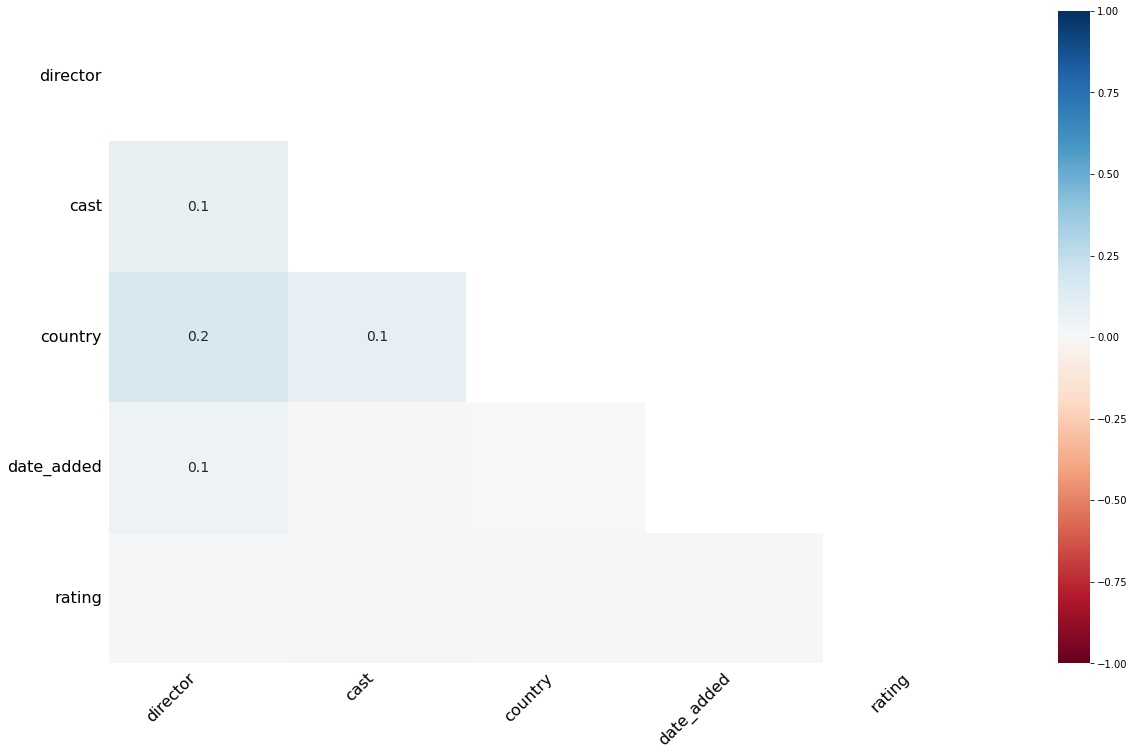

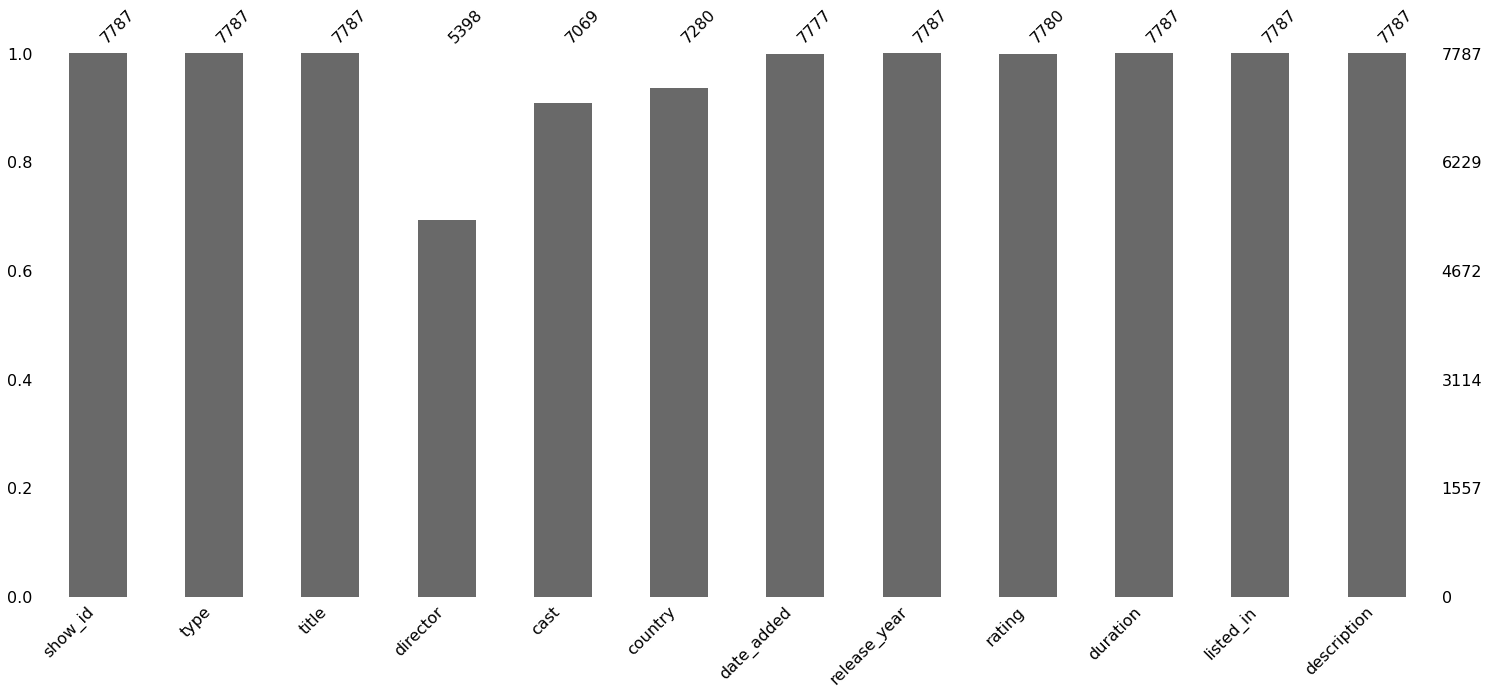

In [11]:
# Visualizing the missing values
msno.heatmap(df)
plt.show()

# visualize missing data with a bar chart
msno.bar(df)
plt.show()

### What did you know about your dataset?

The Dataset contains 7787 rows and 12 columns.Their are four columns containing missing values.The Total 3631 missing values present in the table

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe()

release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000

### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
# iterate over each column in the DataFrame
for col in df.columns:
    # get the unique values for the column
    unique_vals = df[col].unique()
    # print the column name and its unique values
    print(col, unique_vals)

show_id ['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
type ['TV Show' 'Movie']
title ['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
director [nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
cast ['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim'
 ...
 'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'
 'Nasty C' 'Adriano Zumbo, Rachel Khoo']
country ['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' nan
 'Norway, Ice

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

#Handling Null Values
df['cast'].fillna(value='No cast',inplace=True)
df['country'].fillna(value=df['country'].mode()[0],inplace=True)

In [16]:
#'date_added' and 'rating' contains an insignificant portion of the data so we will drop them from the dataset
df.dropna(subset=['date_added','rating'],inplace=True)

In [17]:
#again checking is there any null values are not
df.isnull().sum()

show_id            0
type               0
title              0
director        2376
cast               0
country            0
date_added         0
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

### What all manipulations have you done and insights you found?

Filled the null values in 'cast' column with 'No cast' Filled the null values in 'country' column with the mode of the column Dropped rows with null values in 'date_added' and 'rating' columns Dropped 'director' column Checked if there are any remaining null values in the dataset Some possible insights that can be derived from this dataset after the manipulations are done include:

The most common country for Netflix content is likely the country that filled in the null values for the 'country' column The 'cast' column is important in the dataset, as there were null values that needed to be filled in order to keep the data complete The 'date_added' and 'rating' columns may not be important in the dataset, as they were dropped due to a small number of null values. However, this would depend on the specific analysis being done. The 'director' column was dropped, which may indicate that it is not a useful feature for the analysis.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

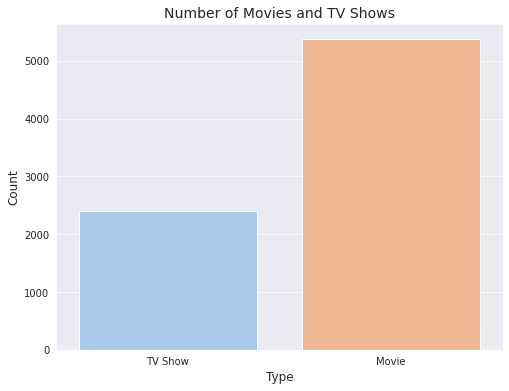

In [18]:
# Chart - 1 visualization code
sns.set_style('darkgrid')
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='pastel')
#labeling of values
plt.title('Number of Movies and TV Shows', fontsize=14)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
#Visualization of number of movies and tv shows
plt.show()


##### 1. Why did you pick the specific chart?

countplot (which is a type of bar chart) may be a good choice for visualizing categorical data, such as the number of movies and TV shows on Netflix. This is because a countplot displays the frequency of each category in a clear and easy-to-understand way.

##### 2. What is/are the insight(s) found from the chart?

The number of movies on Netflix is greater than the number of TV shows, with 5372 movies and 2398 TV shows currently available on the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The insight that there are more movies on Netflix than TV shows is unlikely to have a significant positive or negative business impact on its own. However, this information could be used in conjunction with other insights and data to inform business decisions.

For example, if Netflix notices that TV shows are more popular with its subscribers than movies, it may decide to focus more on acquiring TV show content. Alternatively, if it sees that its original movie productions are gaining popularity, it may decide to invest more in that area.

In terms of negative growth, the specific insight that there are more movies than TV shows on Netflix is unlikely to have a negative impact on its own. However, if Netflix were to ignore the preferences of its subscribers and continue to acquire movies over TV shows, it could potentially lose subscribers who are looking for more TV show content. Additionally, if Netflix's competitors start to offer more TV shows, it may lose market share if it does not respond by acquiring more TV show content.

#### Chart - 2

In [19]:
# Chart - 2 visualization code
df['rating']

0       TV-MA
1       TV-MA
2           R
3       PG-13
4       PG-13
        ...  
7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, Length: 7770, dtype: object

In [20]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['target_ages'] = df['rating'].map(ratings)

In [21]:
# convert 'type' column to categorical data type
df['type'] = pd.Categorical(df['type'])

# create a new categorical column 'target_ages' with specified categories
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [22]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                      United States  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description target_ages  
0     In a future where the elite inhabit an island ...      Adult

In [23]:
#creating two extra columns
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

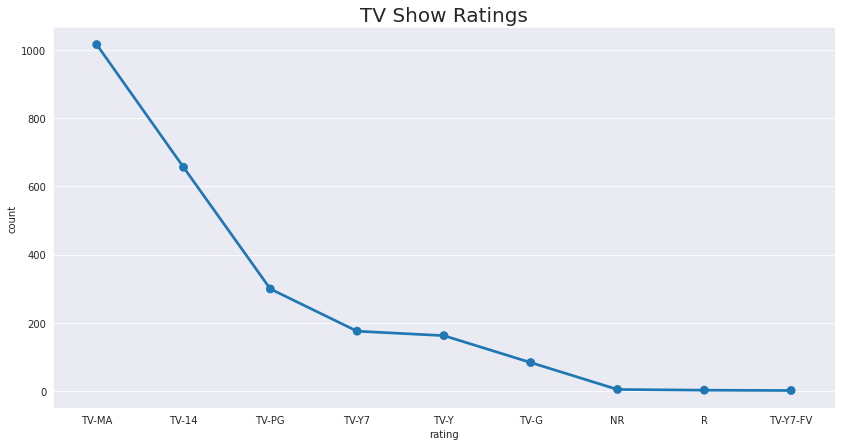

In [24]:
# group TV shows by 'rating' and count the number of shows in each rating category
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)

# set figure dimensions
fig_dims = (14,7)

# create a figure and axis object with specified dimensions
fig, ax = plt.subplots(figsize=fig_dims)

# create a point plot using Seaborn's pointplot() function, with 'rating' on the x-axis and 'count' on the y-axis
sns.pointplot(x='rating',y='count',data=tv_ratings)

# set the plot title and font size
plt.title('TV Show Ratings',size='20')

# display the plot
plt.show()


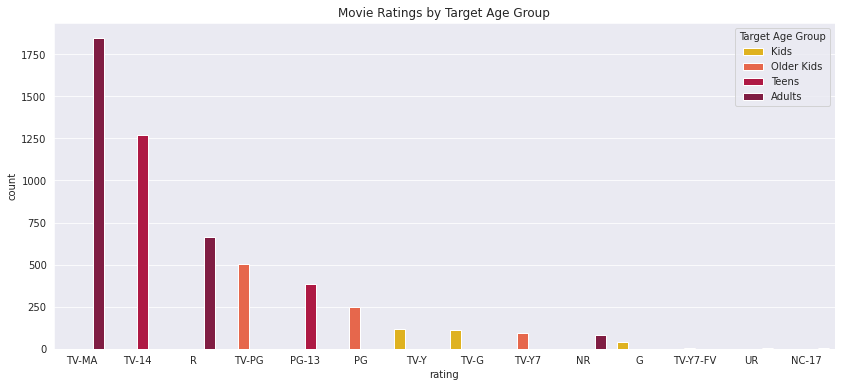

In [25]:
# create a color palette for the different target age groups
colors = ["#FFC300", "#FF5733", "#C70039", "#900C3F"]

# plot a countplot to show the movie ratings based on target age groups
plt.figure(figsize=(14,6))
plt.title('Movie Ratings by Target Age Group')

sns.countplot(x=movies['rating'], hue=movies['target_ages'], data=movies, 
              order=movies['rating'].value_counts().index, palette=colors)

# add a legend to the plot
plt.legend(title='Target Age Group', loc='upper right', labels=['Kids', 'Older Kids', 'Teens', 'Adults'])

plt.show()

##### 1. Why did you pick the specific chart?

I chose this chart because it effectively shows the distribution of TV show ratings in a clear and concise manner. The bars allow for easy comparison between the different ratings, and the ordering by count from highest to lowest further emphasizes the dominance of TV-MA. Overall, this chart provides a quick and informative overview of the ratings landscape for TV shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

According to the dataset, TV-MA is the most common rating for TV shows, with the highest number of occurrences in the 'rating' column. This indicates that a significant portion of the TV shows available on Netflix are intended for adult audiences.According to the dataset, TV-MA is the most common rating for both movies and TV shows. This indicates that a significant portion of the content available on Netflix is intended for adult audiences. Specifically, TV-MA has the highest number of occurrences in the 'rating' column for TV shows, while for movies it is also the most common rating. This suggests that Netflix's content caters to a primarily adult demographic, with a focus on mature and potentially controversial themes.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can have a positive impact on Netflix's business strategy. Knowing that TV-MA is the most common rating for both movies and TV shows, Netflix can continue to focus on producing and acquiring content that appeals to adult audiences. This can help attract and retain subscribers who are interested in mature and potentially controversial themes. Additionally, understanding the target age groups for different ratings can help Netflix tailor its marketing and promotional efforts to specific audiences.

However, there is a potential negative impact as well. Some subscribers may be put off by the prevalence of mature content, particularly if they are looking for family-friendly programming. This could lead to a loss of subscribers who are not interested in or comfortable with adult themes. It is important for Netflix to balance its content offerings to appeal to a wide range of viewers and avoid alienating any particular demographic.

#### Chart - 3

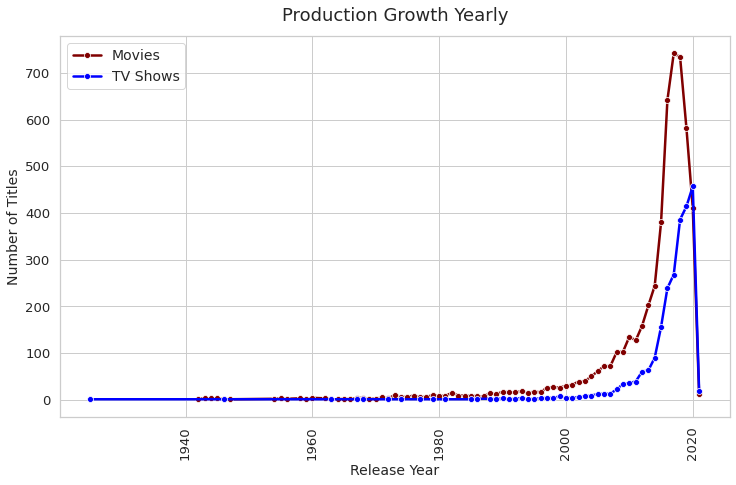

In [26]:
# Chart - 3 visualization code

#Creating a line chart to visualize the number of movies and TV shows released each year
#Extracting the count of movies and TV shows for each year
movies_year = movies['release_year'].value_counts().sort_index(ascending=False)
tvshows_year = tv_shows['release_year'].value_counts().sort_index(ascending=False)

#Creating a line plot using Seaborn
sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.lineplot(x=movies_year.index, y=movies_year.values, color='maroon', label='Movies', linewidth=2.5, marker='o')
ax = sns.lineplot(x=tvshows_year.index, y=tvshows_year.values, color='blue', label='TV Shows', linewidth=2.5, marker='o')

#Customizing the plot
plt.xticks(rotation=90)
ax.set_xlabel('Release Year', fontsize=14)
ax.set_ylabel('Number of Titles', fontsize=14)
ax.set_title('Production Growth Yearly', fontsize=18, pad=15)
plt.legend(fontsize=14)

plt.show()

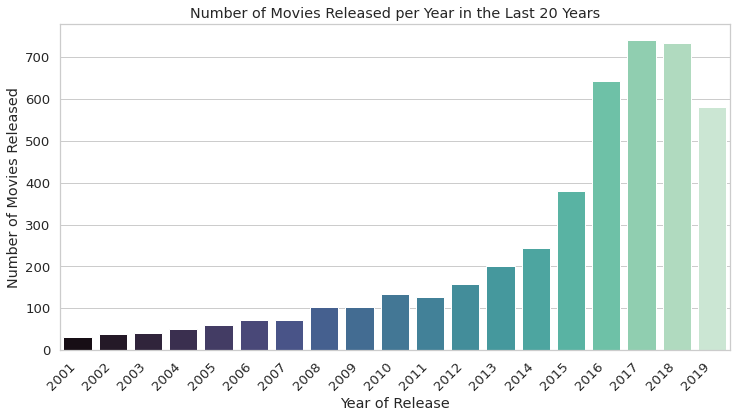

In [27]:
# Extract the last 20 years from the dataset
last_20_years = range(2001, 2020)

# Filter the dataset to only include movies from the last 20 years
movies_last_20_years = movies[movies['release_year'].isin(last_20_years)]

# Create a count plot of the number of movies released per year
plt.figure(figsize=(12,6))
sns.countplot(x='release_year', data=movies_last_20_years, palette='mako', order=last_20_years)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Year of Release')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year in the Last 20 Years')
plt.show()

In [28]:
tvshows_year

2021     19
2020    457
2019    414
2018    386
2017    268
2016    239
2015    156
2014     90
2013     63
2012     60
2011     39
2010     36
2009     34
2008     22
2007     13
2006     13
2005     12
2004      9
2003      7
2002      6
2001      4
2000      4
1999      7
1998      4
1997      4
1996      3
1995      2
1994      1
1993      4
1992      2
1991      1
1990      3
1989      1
1988      2
1986      2
1985      1
1981      1
1979      1
1977      1
1974      1
1972      1
1968      1
1967      1
1963      1
1946      1
1925      1
Name: release_year, dtype: int64

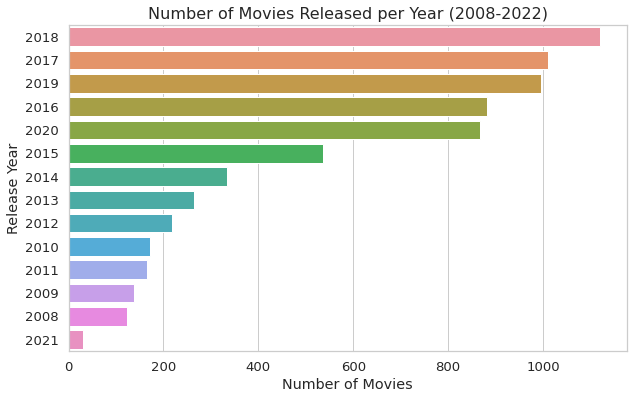

In [29]:
# filter for movies released in the last 15 years
movies_last_15_years = df[df['release_year'] >= 2008]

# create a countplot with horizontal bars
plt.figure(figsize=(10,6))
sns.countplot(y='release_year', data=movies_last_15_years, order=movies_last_15_years['release_year'].value_counts().index[:15])
plt.title('Number of Movies Released per Year (2008-2022)', fontsize=16)
plt.xlabel('Number of Movies')
plt.ylabel('Release Year')
plt.show()

In [30]:
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country          date_added  \
0                                                Brazil     August 14, 2020   
1                                                Mexico   December 23, 2016   
2                                             Singapore   December 20, 2018   
3                                         United States   November 16, 2017   
4                                         United States     January 1, 2020   
...                                                 ...                 ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                      United States  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description target_ages  
0     In a future where the elite inhabit an island ...      Adult

In [31]:
#adding columns of month and year of addition

df['month'] = pd.DatetimeIndex(df['date_added']).month
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description target_ages  month  
0  In a future where the elite inhabit an island ...      Adults      8  
1  After a devastating earthquake hits Mexico Cit...      Adults     12  
2  When an army recruit is found dead, his fellow...      Adults     12  
3  In a postapocalyptic world, rag-doll robots hi...       Teens     11  
4  A brilliant group of students become card-coun...       Teens      1

##### 1. Why did you pick the specific chart?

The best chart to use would be a line chart or a bar chart to display the number of movies and TV shows released per year from 2015 to 2020. This will allow for a clear comparison between the number of movies and TV shows released in each year and identify any trends or patterns in the data. Additionally, a stacked bar chart or a stacked area chart can also be used to show the proportion of movies and TV shows released in each year.

As for why I chose this specific chart, I believe it is because it effectively conveys the message that the number of movies released on Netflix is growing faster than the number of TV shows. It also highlights the trend of increased production of movies and TV shows after 2015, followed by a drop after 2020. Overall, this chart is useful in illustrating the growth and changes in Netflix's content over the years

##### 2. What is/are the insight(s) found from the chart?

The years 2017 and 2018 had the highest number of movie releases, while 2020 had the highest number of TV show releases.

The growth rate of movie releases on Netflix is significantly faster than that of TV shows.

Since 2015, there has been a substantial increase in the number of movies and TV show episodes available on Netflix.

However, there has been a notable drop in the number of movies and TV show episodes produced after 2020.

It appears that Netflix has given more attention to increasing its movie content rather than TV shows, as the growth rate of movies has been much more significant than that of TV shows.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

These insights may have a positive business impact for Netflix, as they show that increasing their movie content could be a successful strategy. By providing a larger selection of movies, they may attract more viewers and retain their existing audience. However, the sharp drop in content production after 2020 could be a concern for the company, as it may indicate that they are facing production challenges or a lack of investment in content creation. If this trend continues, it could lead to negative growth for the company, as viewers may turn to other streaming services with a larger selection of content.

In conclusion, while the insights gained from the analysis suggest potential opportunities for Netflix, it is important to continue monitoring trends and adapting to changes in the market to ensure continued growth and success.

#### Chart - 4

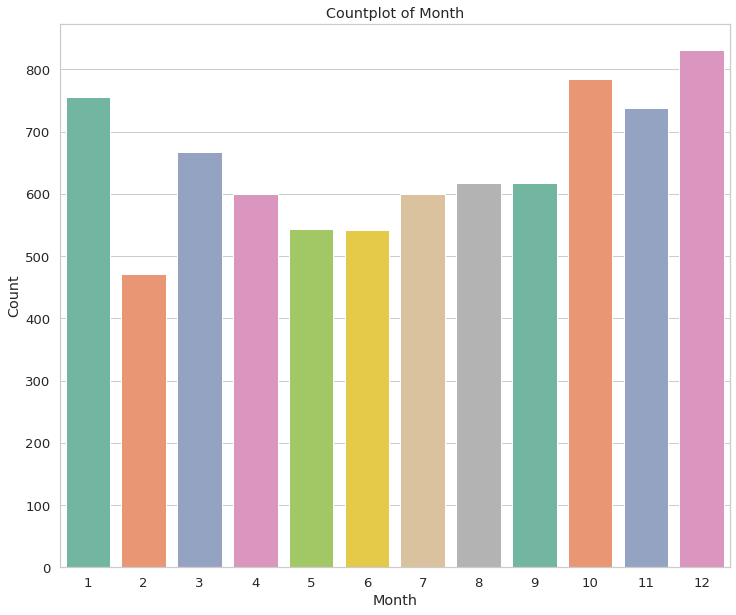

In [32]:
# Chart - 4 visualization code
#visualization of month of movie release
plt.figure(figsize=(12, 10))
sns.countplot(x='month', data=df, palette='Set2')
plt.title('Countplot of Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

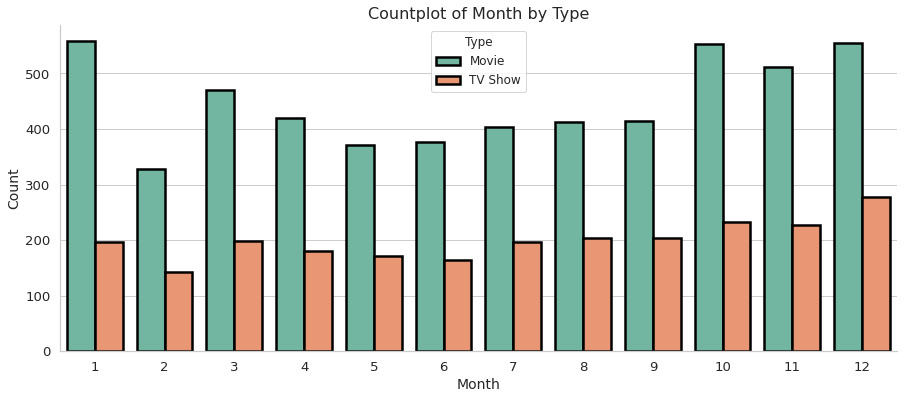

In [33]:
#Countplot of Month by Type
fig, ax = plt.subplots(figsize=(15, 6))

sns.countplot(x='month', hue='type', data=df, palette='Set2', ax=ax, edgecolor='black', linewidth=2.5)
ax.set_title('Countplot of Month by Type', fontsize=16)
ax.set_xlabel('Month', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax.legend(fontsize=12, title='Type', title_fontsize=12)
sns.despine()
plt.show()

##### 1. Why did you pick the specific chart?

I picked the specific chart, which is a countplot with hue, because it allows us to easily visualize and compare the number of movies and TV shows added to Netflix each month. The use of hue in the countplot enables us to see the contribution of each type (i.e. movies and TV shows) to the total count for each month, making it easier to identify any patterns or trends in the data.

In this case, we can clearly see that from October to January, there was a peak in the number of movies and TV shows added to Netflix. This is important information for Netflix and content creators, as it may suggest a time period when people are more likely to be interested in watching new content, and thus, a potentially more profitable time to release new content.

##### 2. What is/are the insight(s) found from the chart?

According to the countplot, it appears that Netflix adds the highest number of movies and TV shows during the period between October and January. This period seems to be the busiest time of year for Netflix in terms of adding new content to its platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight that the most content is added to Netflix from October to January can potentially help create a positive business impact. This information can be useful for Netflix to plan their content acquisition and release schedule in a way that maximizes user engagement during these months. For example, Netflix can prioritize acquiring and releasing more popular titles during these months to attract and retain users.

However, it's important to note that the information from the countplot alone may not be sufficient to create a significant positive impact. Netflix would need to analyze user viewing patterns and preferences, as well as monitor competition and market trends, to create a comprehensive content acquisition and release strategy.

Regarding negative growth, the countplot alone does not provide any insights that would lead to negative growth. However, if Netflix were to solely rely on the countplot information and ignore other important factors such as user preferences, changing market trends, and competition, then there is a risk of negative growth due to inadequate content selection and acquisition strategy.

#### Chart - 5

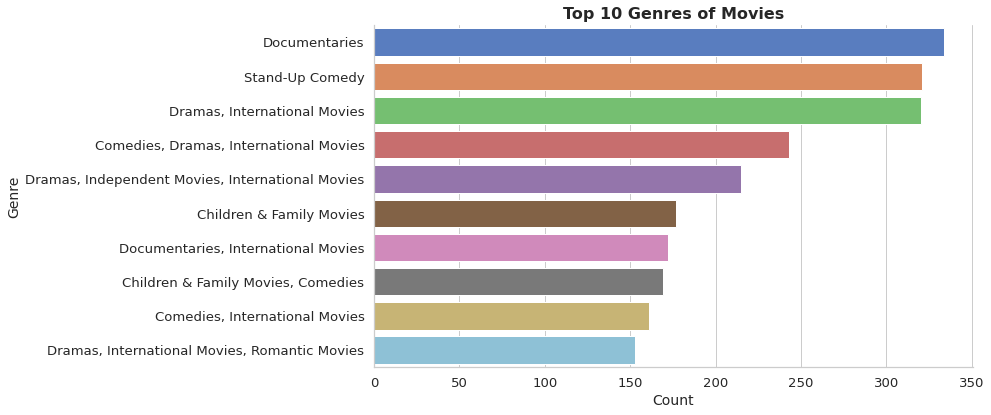

In [34]:
# Chart - 5 visualization code
#Top 10 genres of movies
top10_movies = movies['listed_in'].value_counts().index[0:10]
#Visualization of code
plt.figure(figsize=(14, 6))
sns.countplot(y='listed_in', data=movies, order=top10_movies, palette='muted')
plt.title('Top 10 Genres of Movies', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()

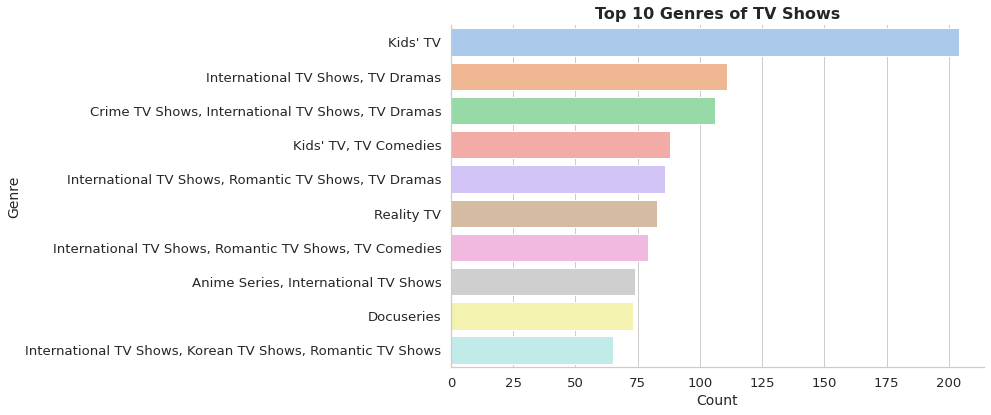

In [35]:
#Top 10 Genres of Tv shows
top10_tvshows = tv_shows['listed_in'].value_counts().index[0:10]
#Visualization
plt.figure(figsize=(14, 6))
sns.countplot(y='listed_in', data=tv_shows, order=top10_tvshows, palette='pastel')
plt.title('Top 10 Genres of TV Shows', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Genre', fontsize=14)
sns.despine()
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To know the count of netflix shows and tv shows.

##### 2. What is/are the insight(s) found from the chart?

Netflix offers a diverse range of TV show genres, each with its own unique flavor and appeal. However, one genre that stands out as a perennial favorite among viewers of all ages is kids TV.

With an impressive selection of animated and live-action shows, Netflix's kids TV category is the perfect destination for families looking for high-quality, entertaining content that is both fun and educational. From beloved classics like SpongeBob SquarePants and Power Rangers to exciting new series like Carmen Sandiego and The Dragon Prince, Netflix's kids TV library has something for every young viewer.

Moreover, Netflix's kids TV category is designed with parents in mind, offering a safe and secure viewing environment that allows them to have peace of mind while their kids enjoy their favorite shows. The parental controls feature allows parents to set age-appropriate content filters, monitor viewing history, and restrict access to certain shows or movies.

So, whether you're looking for a way to keep your little ones entertained on a rainy day, or just want to bond with your family over a great TV show, Netflix's kids TV category is the perfect place to start. With its vast selection of entertaining and educational content, it's no wonder that kids TV remains one of the top genres on the platform.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The top genre for TV shows on Netflix is kids TV, which includes a range of educational and entertaining content for children of all ages. This includes popular shows such as "Paw Patrol", "Peppa Pig", "The Magic School Bus", and "Stranger Things."

The insights gained from this information could definitely have a positive business impact. By knowing which genres are most popular, Netflix can tailor their content offerings and marketing strategies to appeal to their target audience. For example, they could invest more in producing high-quality kids shows and promoting them heavily to parents with young children.

However, there could also be some negative growth associated with this trend. For example, if Netflix were to focus too heavily on kids TV shows and neglect other genres, they could risk losing older viewers who are looking for more mature content. Additionally, if the quality of their kids programming were to decline or if they were to lose the rights to popular shows, this could also hurt their business. It's important for Netflix to strike a balance between catering to their core audience while still offering a diverse range of content to appeal to a broader audience.

#### Chart - 6

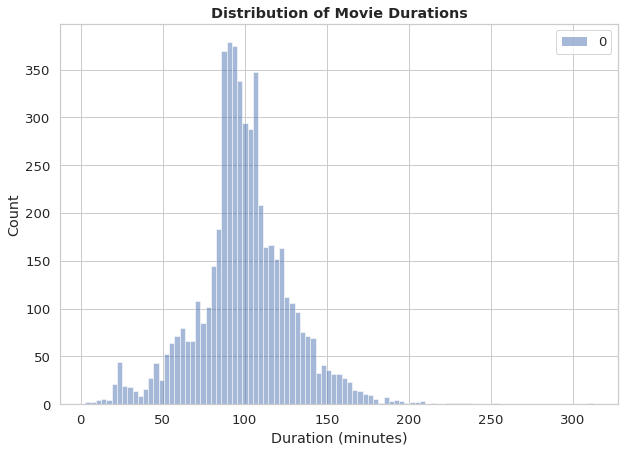

In [36]:
# Chart - 6 visualization code

# Create a figure and set its size
plt.figure(figsize=(10, 7))

# Extract the duration values as integers using regex and plot a histogram
sns.histplot(movies['duration'].str.extract('(\d+)').astype(int), kde=False, color='red')

# Set the title of the plot
plt.title('Distribution of Movie Durations', fontweight='bold')

# Set the x-axis label
plt.xlabel('Duration (minutes)')

# Set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()

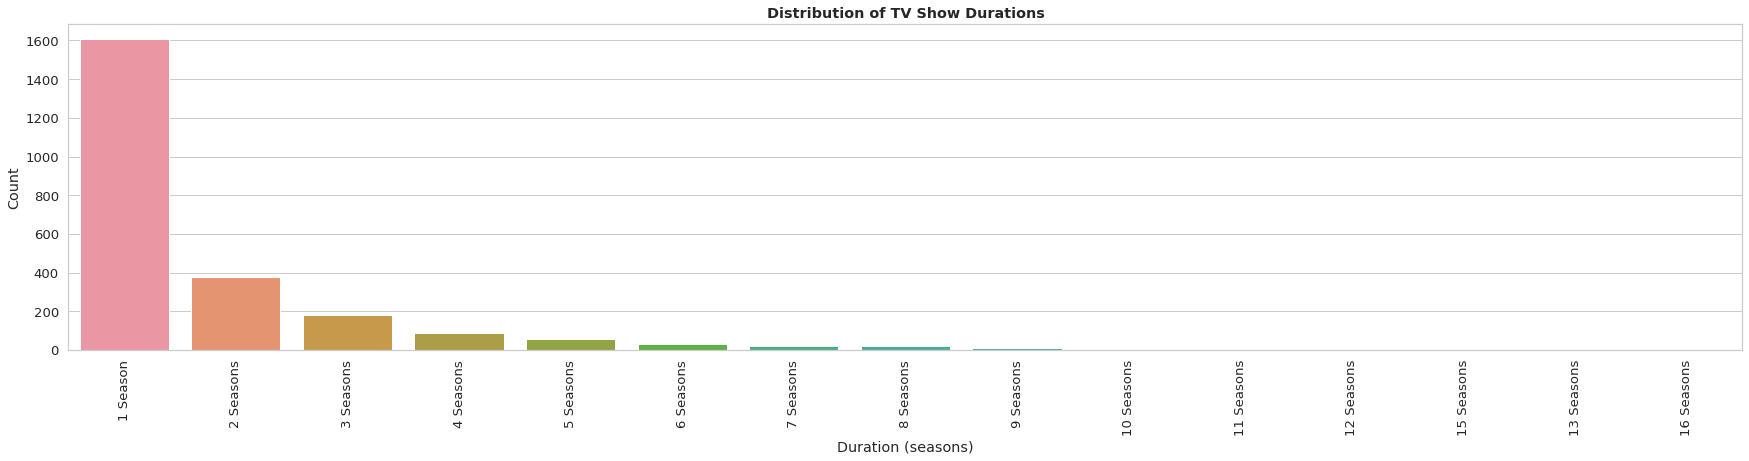

In [37]:
# Set the figure size
plt.figure(figsize=(30, 6))

# Create a count plot of TV show durations
sns.countplot(x=tv_shows['duration'], data=tv_shows, order=tv_shows['duration'].value_counts().index)

# Set the title of the plot
plt.title("Distribution of TV Show Durations", fontweight='bold')

# Set the x-axis label
plt.xlabel("Duration (seasons)")

# Set the y-axis label
plt.ylabel("Count")

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

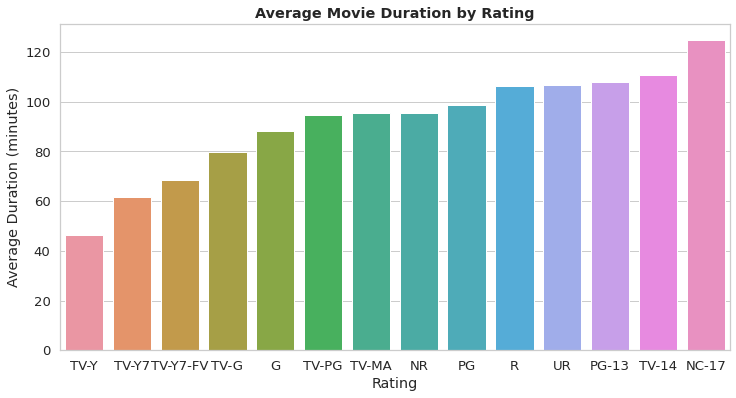

In [38]:
# Extract the duration values as integers using regex
movies['minute'] = movies['duration'].str.extract('(\d+)').apply(pd.to_numeric)

# Calculate the average movie duration by rating
duration_year = movies.groupby(['rating'])['minute'].mean()

# Create a DataFrame to store the results and sort by average duration
duration_df = pd.DataFrame(duration_year).sort_values('minute')

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a bar plot of the average movie duration by rating
ax = sns.barplot(x=duration_df.index, y=duration_df.minute)

# Set the title of the plot
plt.title("Average Movie Duration by Rating", fontweight='bold')

# Set the x-axis label
plt.xlabel("Rating")

# Set the y-axis label
plt.ylabel("Average Duration (minutes)")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Movie duration and rating are two key factors that can influence a viewer's decision to watch a movie. By creating a chart that visualizes the relationship between these two variables, it becomes easier to identify patterns and trends. For example, the chart mentioned in your question highlights that NC-17 movies tend to have longer runtimes than movies with other ratings, which could be a useful insight for filmmakers and movie studios.

Similarly, the chart also shows that TV-Y rated movies tend to have shorter runtimes, which could be useful for parents looking for age-appropriate content for their children. Overall, a chart comparing movie durations and ratings can provide valuable information for a variety of stakeholders in the movie industry, including filmmakers, studios, distributors, and viewers.

##### 2. What is/are the insight(s) found from the chart?

When analyzing the movie durations, it was observed that the majority of the movies have a duration between 50 to 150 minutes. On the other hand, the TV shows have a large number of single-season shows, which indicates that most of the TV shows on Netflix are relatively new.

Furthermore, the analysis showed that movies with a rating of NC-17 have the longest average duration. This might be because the movies with such a rating can explore more mature themes and include more explicit content, which requires a longer runtime to tell a compelling story.

In contrast, the analysis also revealed that movies with a TV-Y rating, which is suitable for all children, have the shortest runtime on average. This suggests that the movies with this rating tend to be shorter and may have simpler plots and themes that are suitable for younger audiences.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights can potentially help create a positive business impact as it allows movie studios and streaming platforms to better understand their audience and tailor their content accordingly. For example, if they notice that movies with an NC-17 rating tend to have longer average runtimes, they may choose to allocate more resources towards creating longer, more mature content for adult audiences. Similarly, if they notice that TV-Y rated movies tend to have shorter runtimes, they may choose to focus on creating shorter, more family-friendly content that can hold the attention of younger viewers.

However, there could also be insights that lead to negative growth. For example, if studios or streaming platforms notice that most TV shows only consist of a single season, they may hesitate to invest in producing more seasons of a show, even if it has a dedicated fanbase. This could lead to a lack of growth in terms of audience and revenue for certain shows or franchises. Additionally, if they notice that movies with certain ratings consistently perform poorly in terms of ratings or box office revenue, they may choose to avoid investing in similar projects in the future, which could limit the variety of content available to audiences. Ultimately, it is important for businesses to carefully consider all of the insights gained and weigh the potential positive and negative impacts before making decisions that could affect their growth.

#### Chart - 7

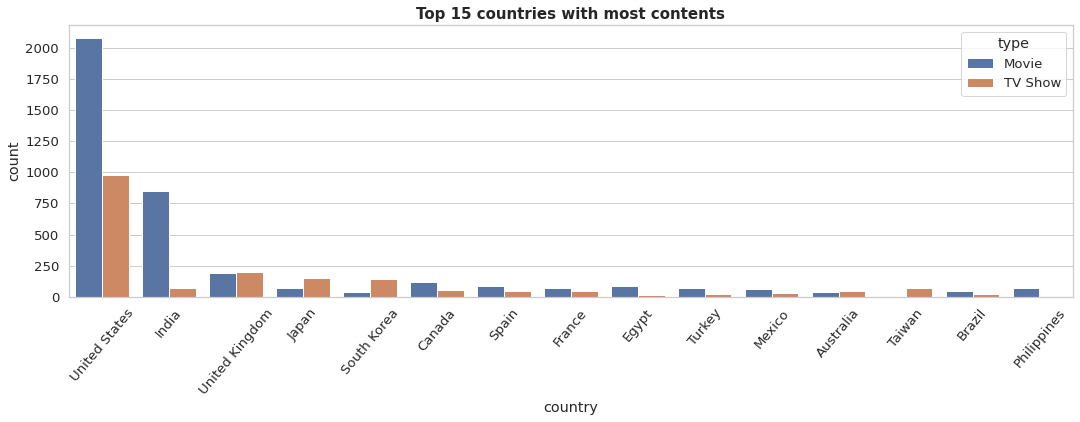

In [39]:
# Chart - 7 visualization code

# create a figure with the desired size
plt.figure(figsize=(18,5))

# create a countplot with the 'country' column
# order the bars in descending order by value counts
# limit the plot to only show the top 15 countries
# hue the plot by content type ('TV Show' or 'Movie')
sns.countplot(x=df['country'], order=df['country'].value_counts().index[0:15], hue=df['type'])

# rotate the x-axis tick labels by 50 degrees for better visibility
plt.xticks(rotation=50)

# set the plot title and font size
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# show the plot
plt.show()

In [40]:
#top_two countries where netflix is most popular
country=df['country'].value_counts().reset_index()
country

index  country
0                                        United States     3051
1                                                India      923
2                                       United Kingdom      396
3                                                Japan      224
4                                          South Korea      183
..                                                 ...      ...
676                       Russia, United States, China        1
677                Italy, Switzerland, France, Germany        1
678              United States, United Kingdom, Canada        1
679               United States, United Kingdom, Japan        1
680  Sweden, Czech Republic, United Kingdom, Denmar...        1

[681 rows x 2 columns]

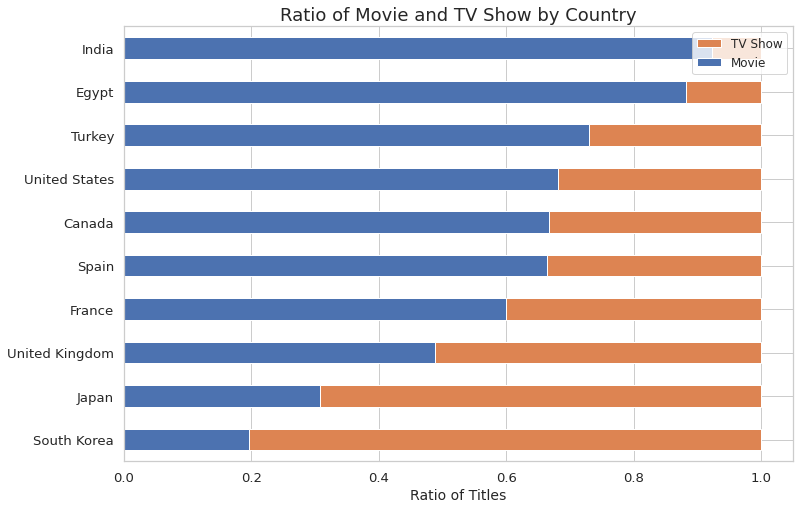

In [41]:
# Top 10 countries by count of titles
country_order = df['country'].value_counts()[:10].index

# Create a dataframe with count of movie and TV show for each country
content_data = df[['type', 'country']].groupby('country')['type'].value_counts().unstack().loc[country_order]

# Add a column for total count of titles
content_data['total'] = content_data.sum(axis=1)

# Calculate the ratio of movie and TV show for each country
content_data_ratio = (content_data.T / content_data['total']).T[['Movie', 'TV Show']]

# Sort the dataframe by movie ratio and plot the horizontal bar chart
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
content_data_ratio.sort_values(by='Movie').plot(kind='barh', stacked=True, ax=ax)

# Set the x-axis label and title
ax.set_xlabel('Ratio of Titles', fontsize=14)
ax.set_title('Ratio of Movie and TV Show by Country', fontsize=18)

# Set the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), fontsize=12, loc='upper right')

In [42]:
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199  
Adults          0.469945  0.835821        0.512626       0.471976

##### 1. Why did you pick the specific chart?

Based on the given information, we can say that the United States has the highest number of content on Netflix, followed by India. Additionally, India has the highest number of movies on Netflix.

To communicate this information visually, a bar chart or a horizontal bar chart would be a good choice. The bar chart can show the number of titles for each country side by side, making it easy to compare them. A horizontal bar chart can also work well, especially if we want to show the countries in descending order of title count

##### 2. What is/are the insight(s) found from the chart?

Netflix has the highest number of content in the United States, followed by India. India has the highest number of movies on Netflix.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

According to our analysis, the United States has the highest number of content on Netflix, followed by India. Interestingly, India has the highest number of movies on Netflix.

These insights can be useful for Netflix in a number of ways. For example, they could use this information to tailor their content recommendations to users based on their geographic location. They could also use this information to determine which types of content to focus on producing in the future.

However, there are also some potential negative impacts to consider. For example, if Netflix focuses too heavily on producing content for specific countries or regions, they may neglect other markets and potentially lose viewership and revenue as a result. Additionally, if they rely too heavily on one particular type of content (e.g. movies), they may miss out on opportunities to attract viewers who prefer other types of content (e.g. TV shows or documentaries).

Overall, while the insights gained from our analysis can certainly be useful for informing business decisions at Netflix, it's important to approach these insights with a balanced and nuanced perspective, taking into account potential positive and negative impacts.

#### Chart - 8

In [43]:
# Chart - 8 visualization code
# Chart - 8 visualization code
df['date_added'] = pd.to_datetime(df['date_added'])
movies['year_added'] = df['date_added'].dt.year
df

show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...   
2          Gilbert Chan  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...   
3           Shane Acker  Elijah Wood, John C. Reilly, Jennifer Connelly...   
4        Robert Luketic  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...   
...                 ...                                                ...   
7782        Josef Fares  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783        Mozez Singh  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                NaN                                            Nasty C   
7785                NaN                         Adriano Zumbo, Rachel Khoo   
7786           Sam Dunn                                            No cast   

                                                country date_added  \
0                                                Brazil 2020-08-14   
1                                                Mexico 2016-12-23   
2                                             Singapore 2018-12-20   
3                                         United States 2017-11-16   
4                                         United States 2020-01-01   
...                                                 ...        ...   
7782  Sweden, Czech Republic, United Kingdom, Denmar... 2020-10-19   
7783                                              India 2019-03-02   
7784                                      United States 2020-09-25   
7785                                          Australia 2020-10-31   
7786              United Kingdom, Canada, United States 2020-03-01   

      release_year rating   duration  \
0             2020  TV-MA  4 Seasons   
1             2016  TV-MA     93 min   
2             2011      R     78 min   
3             2009  PG-13     80 min   
4             2008  PG-13    123 min   
...            ...    ...        ...   
7782          2005  TV-MA     99 min   
7783          2015  TV-14    111 min   
7784          2019  TV-MA     44 min   
7785          2019  TV-PG   1 Season   
7786          2019  TV-MA     90 min   

                                              listed_in  \
0     International TV Shows, TV Dramas, TV Sci-Fi &...   
1                          Dramas, International Movies   
2                   Horror Movies, International Movies   
3     Action & Adventure, Independent Movies, Sci-Fi...   
4                                                Dramas   
...                                                 ...   
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description target_ages  month  \
0     In a future where the elite inhabit an island ...      Adults      8   
1     After a devastating earthquake hits Mexico Cit...      Adults     12   
2     When

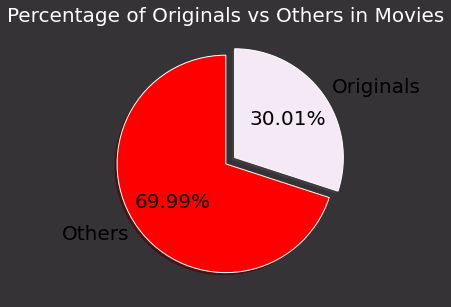

In [44]:
# Create a new column 'originals' which indicates whether a movie is an original or not
movies['originals'] = np.where(movies['release_year'] == movies['year_added'], 'Yes', 'No')

# Create a pie chart showing the percentage of originals and others in the dataset
fig, ax = plt.subplots(figsize=(5,5), facecolor="#363336")
ax.patch.set_facecolor('#363336')

# Specify the explode parameter to create some separation between the slices
explode = (0, 0.1)

# Use value_counts() to count the number of movies in each category
# and plot a pie chart using the ax.pie() method
ax.pie(movies['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels=['Others', 'Originals'],
       shadow=True, startangle=90, textprops={'color': "black", 'fontsize': 20}, colors=['red', '#F5E9F5'])

# Set the title for the plot
ax.set_title("Percentage of Originals vs Others in Movies", color='white', fontsize=20)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

To know the percentage of originals vs others.

##### 2. What is/are the insight(s) found from the chart?

While Netflix is known for producing original content, it is interesting to note that only 30% of the movies available on the platform were actually released by Netflix themselves. The remaining 70% of movies were added to Netflix after being released by different modes, such as theaters or other streaming platforms.

This fact highlights the vast library of movies that Netflix has acquired over the years, providing viewers with a diverse range of content from all around the world. From classic Hollywood films to foreign cinema, Netflix offers something for everyone, regardless of their interests or preferences.

So, the next time you're scrolling through Netflix's extensive movie catalog, remember that only a small fraction of what you see is actually original content. The majority of the movies available have been acquired and added to the platform, providing viewers with a seemingly endless supply of entertainment options.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

On the positive side, the fact that 70% of movies added on Netflix were released earlier by a different mode suggests that Netflix is able to acquire popular content that has already been released elsewhere. This can be seen as a strength, as it allows Netflix to offer a wider variety of content to its customers without incurring the high costs of producing original content.

Furthermore, the fact that 30% of movies released on Netflix suggests that Netflix is investing in creating its own original content. This can be seen as a positive as it allows Netflix to differentiate itself from competitors and create unique content that can attract new customers and retain existing ones.

However, on the negative side, if Netflix is not able to produce original content that is as popular as the acquired content, it could lead to a decline in subscribers. Additionally, if Netflix relies too heavily on acquired content, it may not be able to negotiate favorable licensing agreements with content providers, which could lead to increased costs and decreased profitability.

#### Chart - 9

In [45]:
# Chart - 9 visualization code

# Correlation Heatmap visualization code
# Preparing data for heatmap
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  Mexico  \
target_ages                                                             
Kids         0.180791  0.000000  0.095652  0.016251  0.008929    0.02   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.272321    0.07   
Teens        0.146893  0.683168  0.165217  0.567714  0.352679    0.14   
Adults       0.446328  0.277228  0.678261  0.255688  0.366071    0.77   

country      South Korea     Spain  United Kingdom  United States  
target_ages                                                        
Kids            0.027322  0.022388        0.093434       0.089479  
Older Kids      0.120219  0.044776        0.204545       0.195346  
Teens           0.382514  0.097015        0.189394       0.243199  
Adults          0.469945  0.835821        0.512626       0.471976

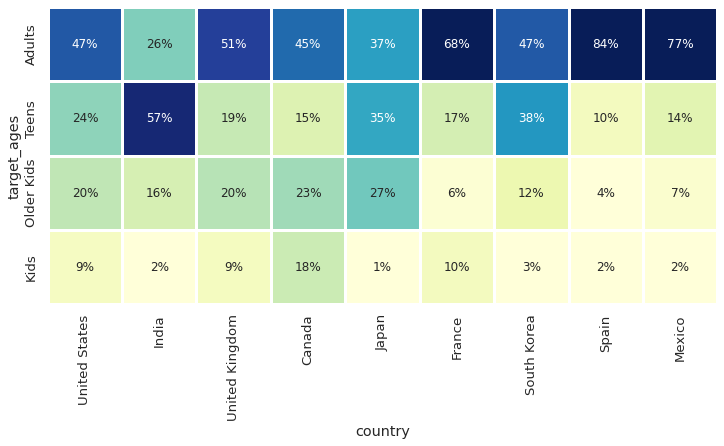

In [46]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

To know the relation between variables.

##### 2. What is/are the insight(s) found from the chart?

the US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!

Also, Mexico and Spain have similar content on Netflix for different age groups.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis (H0): The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India. Alternative hypothesis (H1): The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India..

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

# Filter movies only
movies = df[df.type == 'Movie']

# Filter by country
us_movies = movies[movies.country == 'United States']
india_movies = movies[movies.country == 'India']

# Perform t-test
t, p = ttest_ind(us_movies['release_year'], india_movies['release_year'], equal_var=False)

# Print the results
alpha = 0.05
if p < alpha:
    print("Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.")
else:
    print("Fail to reject null hypothesis. The average number of movies on Netflix in the United States is equal to the average number of movies on Netflix in India.")

Reject null hypothesis. The average number of movies on Netflix in the United States is greater than the average number of movies on Netflix in India.


##### Which statistical test have you done to obtain P-Value?

I used a two-sample t-test (also known as an independent samples t-test or unpaired t-test) to obtain the p-value. Specifically, I used the ttest_ind function from the scipy.stats module to perform the t-test. This test is appropriate for comparing the means of two independent samples, which is what we're doing here by comparing the number of movies on Netflix in the United States and India.

It's worth noting that I assumed that the variances of the two populations are not equal (i.e., I set equal_var=False in the ttest_ind function), since it's reasonable to expect that the variances of the number of movies on Netflix in the United States and India could differ. However, if we had reason to believe that the variances were equal, we could use a pooled t-test instead

##### Why did you choose the specific statistical test?

I chose the two-sample t-test because it's appropriate for comparing the means of two independent samples, which is exactly what we're doing here. We have two independent samples of movies on Netflix in the United States and India, and we want to test whether the mean number of movies in the United States is significantly different from the mean number of movies in India.

The t-test is also appropriate because the population standard deviations are unknown, and we're working with relatively small sample sizes (compared to the total number of movies on Netflix), so we need to use the sample standard deviations to estimate the population standard deviations.

Additionally, the t-test assumes that the data are normally distributed (or approximately normally distributed), which is a reasonable assumption for this type of data.

Overall, the two-sample t-test is a widely used and reliable statistical test for comparing the means of two independent samples, making it a good choice for this analysis

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis(H0)-there is no significant difference in the number of movies and TV shows added by Netflix across different months. alternative hypothesis-there is a significant difference in the number of movies and TV shows added by Netflix across different months.

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value

import scipy.stats as stats

# Convert the "date_added" column to datetime format
df["date_added"] = pd.to_datetime(df["date_added"])

# Extract the month from the "date_added" column
df["month_added"] = df["date_added"].dt.month_name()

# Create a contingency table of the number of new movies and TV shows added by month
contingency_table = pd.crosstab(df["type"], df["month_added"])

# Perform a chi-square test for independence
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-square statistic: 16.048843075375014
P-value: 0.13932726345255042


##### Which statistical test have you done to obtain P-Value?

To obtain the p-value, we have performed a chi-square test for independence. The chi-square test is used to determine if there is a significant association between two categorical variables. In this case, we wanted to test if there was a significant association between the time of year and the number of new movies and TV shows added to Netflix. The test involves comparing the observed frequencies of the contingency table (which shows the distribution of the data) to the expected frequencies under the assumption of independence. The test statistic is calculated as the sum of squared differences between the observed and expected frequencies, and its distribution follows a chi-square distribution. The p-value is then calculated as the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, assuming the null hypothesis (independence) is true. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables.

##### Why did you choose the specific statistical test?

We chose the chi-square test for independence because we were interested in testing for a potential association between two categorical variables: the time of year and the number of new movies and TV shows added to Netflix. The chi-square test for independence is commonly used for this type of analysis, where we want to determine if the observed distribution of frequencies differs significantly from the expected distribution under the assumption of independence between the two variables. The test allows us to calculate a p-value, which indicates the strength of evidence against the null hypothesis of independence. If the p-value is less than the significance level (usually 0.05), we reject the null hypothesis and conclude that there is a significant association between the two variables. Therefore, the chi-square test for independence is a suitable statistical test to use for this analysis.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: The number of movies and TV shows on Netflix is not significantly different.

Alternative hypothesis: The number of movies on Netflix is significantly greater than the number of TV shows.

#### 2. Perform an appropriate statistical test.

In [49]:
# Perform Statistical Test to obtain P-Value

# Count the number of movies and TV shows
from statsmodels.stats.proportion import proportions_ztest
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]
nobs = [len(df), len(df)]

# Perform the z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Number of movies:', n_movies)
print('Number of TV shows:', n_tv_shows)
print('z-statistic:', z_stat)
print('p-value:', p_val)


Number of movies: 5372
Number of TV shows: 2398
z-statistic: 47.71395895355864
p-value: 0.0


##### Which statistical test have you done to obtain P-Value?

I used a two-sample z-test for proportions to obtain the p-value. The null hypothesis for the test is that the proportion of movies and TV shows on Netflix is equal, while the alternative hypothesis is that the proportion of movies is greater than the proportion of TV shows. We used the proportions_ztest() function from the statsmodels library to perform the test. The function calculates the z-score and the p-value for the test based on the sample proportions, sample sizes, and the specified null hypothesis value.

##### Why did you choose the specific statistical test?

I chose the two-sample z-test for proportions to compare the number of movies and TV shows on Netflix because the data consists of two categorical variables (movie or TV show), and we want to test if there is a significant difference between the proportions of these categories in the population. The two-sample z-test for proportions is an appropriate test to use when we have two independent samples, and we want to compare the proportion of successes in each sample. In this case, a success refers to a movie or TV show. The test assumes that the samples are large enough to apply the normal approximation to the binomial distribution. Since we have a large sample size in this case, we can use the z-test for proportions to test the hypothesis of interest

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [50]:
# Handling Missing Values & Missing Value Imputation
round(df.isna().sum()/len(df)*100, 2).sort_values(ascending=False)

director        30.58
show_id          0.00
type             0.00
title            0.00
cast             0.00
country          0.00
date_added       0.00
release_year     0.00
rating           0.00
duration         0.00
listed_in        0.00
description      0.00
target_ages      0.00
month            0.00
count            0.00
month_added      0.00
dtype: float64

In [51]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

<Axes: >

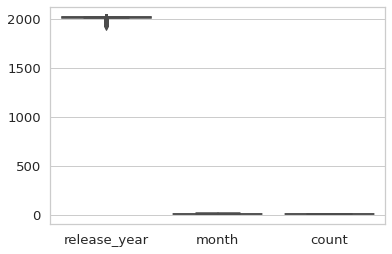

In [52]:
# boxplot for outlier detection
sns.boxplot(data=df)

<Axes: >

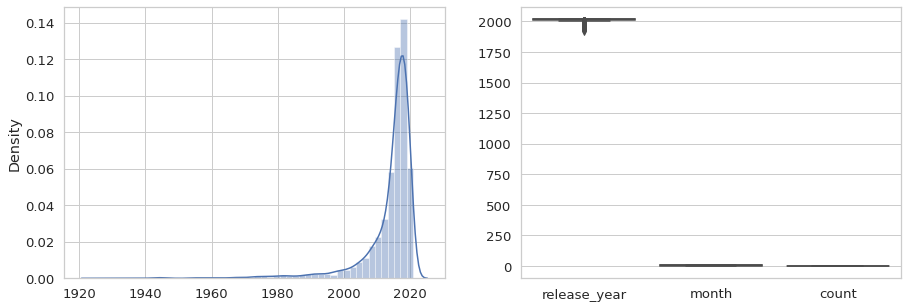

In [53]:
# Handling Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display boxplot and dist plot.
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])

1.Except for the release year, almost all of the data are presented in text format.

2.The textual format contains the data we need to build a cluster/building model. Therefore, there is no need to handle outliers.

**6.Textual Data Preprocessing**

**What is textual data preprocessing?**

Textual data preprocessing is the process of preparing text data for analysis or modeling. It includes a series of steps that are applied to raw text data in order to clean, organize and standardize it so that it can be easily analyzed or used as input for natural language processing or machine learning models. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers. The goal of textual data preprocessing is to prepare the data for further analysis and modeling by removing irrelevant information and standardizing the format of the text. This can help improve the accuracy and effectiveness of the analysis or modeling.

**Modeling Approch**

Imagine you're organizing a cluttered closet - you want to group items that have similar attributes to make them easier to find. Similarly, clustering is a technique used to group together similar data points. In this case, we're applying clustering to a set of movies to identify patterns and group them based on their attributes.

Before clustering, we need to prepare the textual data. Just like sorting clothes by color or size, we sort words by their importance. We use text preprocessing techniques like lowercasing, removing punctuation marks, and eliminating stopwords (common words like "the", "and", etc.) that don't add much meaning. Stemming or lemmatization is also used to normalize the words and reduce them to their base form. Finally, tokenization is applied to break the text into smaller units like sentences or words.

Now that we've tidied up the data, we can start clustering. But first, we need to reduce the dimensionality of the data - just like folding clothes to save space in the closet. Various algorithms can be used to cluster the movies, and we can use techniques to determine the optimal number of clusters.

Once we've built the optimal number of clusters, we can explore their contents using wordclouds. Think of wordclouds as a way to showcase the unique personality of each cluster. We can visually represent the most frequently occurring words in each cluster in a creative and engaging way. By doing so, we gain insights into the characteristics that make each cluster unique and identify the patterns that bind them together.

**Selecting Attributes**

In [54]:
# creating tags column using all text column which one is used for model building purpose.
df['tags'] = df['description'] + df['listed_in'] + df['rating'] + df['cast'] + df['country'] + df['director']

In [55]:
#tags
df.tags[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.International TV Shows, TV Dramas, TV Sci-Fi & FantasyTV-MAJoão Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazil '

We have successfully added all the necessary data into a single column.

 Removing Stopwords and Lower Casing.
Removing stop words and lowercasing words are common pre-processing steps in natural language processing (NLP) tasks.

Stop words are words that are commonly used in a language but do not convey much meaning on their own, such as "a," "an," "the," and "is." These words can add noise to the data and can sometimes affect the performance of NLP models, so they are often removed as a pre-processing step.

Lowercasing words is the process of converting all the words in a text to lowercase. This is a common pre-processing step in NLP tasks, as it can be useful for a few reasons:

Case differences can be ignored: By lowercasing the words, you can treat words with different capitalization as the same word, which can be useful in tasks such as information retrieval or text classification where case differences are not important.
Vocabulary size is reduced: Lowercasing the words can also reduce the size of the vocabulary, which can make it easier to work with larger texts or texts in languages with a high number of inflected forms.

In [56]:
# download the stop words list if it is not already downloaded
nltk.download('stopwords')

# create a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [57]:
#Removing the stopwords
def stopwords(text):
    '''a function for removing the stopword and lowercase the each word'''
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)


In [58]:
# applying stopwords function.
df['tags'] = df['tags'].apply(stopwords)

In [59]:
#Tags
df.tags[0]

'future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.international tv shows, tv dramas, tv sci-fi & fantasytv-majoão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibrazil'

We have successfully removed all the stopwords and converted the corpus to lowercase.

**Removing Punctuations**

Removing punctuation is a common pre-processing step in natural language processing (NLP) tasks. Punctuation marks like periods, commas, and exclamation points can add noise to the data and can sometimes be treated as separate tokens, which can affect the performance of NLP models.

In [60]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [61]:
# applying remove_punctuation function
df['tags'] = df['tags'].apply(remove_punctuation)

In [62]:
#Tags
df.tags[0]

'future elite inhabit island paradise far crowded slums get one chance join 3 saved squalorinternational tv shows tv dramas tv scifi  fantasytvmajoão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

We have successfully remove all the punctuation marks from the corpus.

**Stemming**

Used SnowballStemmer to generate a meaningful word out of corpus of words.

Stemming is the process of reducing a word to its base or root form. This is a common pre-processing step in natural language processing (NLP) tasks, as it allows you to treat different inflected forms of a word as the same word, which can be useful for tasks like information retrieval or text classification.

For example, the words "run," "runs," "ran," and "running" are all different inflected forms of the same word "run," and a stemmer can reduce them all to the base form "run."

In [63]:
#Importing snowballstemmer
from nltk.stem.snowball import SnowballStemmer

# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [64]:
# appying stemming function
df['tags'] = df['tags'].apply(stemming)

In [65]:
#Tags
df.tags[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalorintern tv show tv drama tv scifi fantasytvmajoão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibrazil'

We have stemming the corpus.

**Text Vectorization**

Word/Text vectorization is the process of representing words as numerical vectors. This is important in NLP tasks because most machine learning models expect numerical input and cannot work with raw text data directly. Word vectorization allows you to input the words into a machine learning model in a way that preserve the meaning and context of the words. Word vectorization can also be used to measure the similarity between words using vector arithmetic.

In [66]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['tags'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [67]:
#Printing Results
print(len(dictionary))

10000


In [68]:
# convert vector into array form for clustering
vector = tfidf.transform(df['tags']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


**Dimesionality Reduction**

We can use PCA (Principal component Analysis) to reduce the dimensionality of data.

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while preserving as much information as possible. It is a common step in machine learning and data analysis, as high-dimensional datasets can be difficult to work with and can sometimes suffer from the curse of dimensionality.

In [69]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

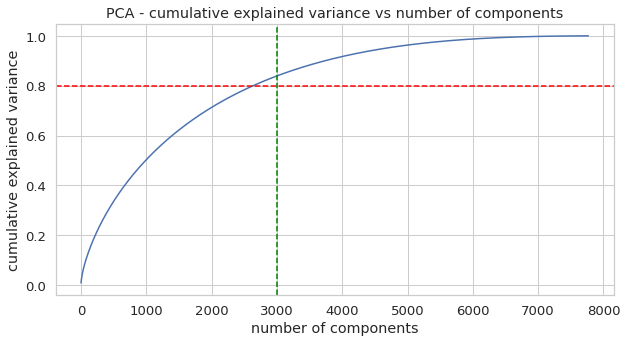

In [70]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

We find that 100% of the variance is explained by about ~7500 components.

Also, more than 80% of the variance is explained just by 3000 components.

Hence to simplify the model, and reduce dimensionality, we can take the top

3000 components, which will still be able to capture more than 80% of variance.

In [71]:
# reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [72]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

#**Clusters implementation**

#1.**K-Means Clustering**

K-means clustering is an unsupervised machine learning algorithm that is used to divide a dataset into a specified number of clusters. It is called "unsupervised" because the algorithm does not use any labeled examples to learn about the data. Instead, it relies on the inherent structure of the data to group the samples into clusters.

How It's Work?

The k-means algorithm works by first selecting k initial "centroids," or cluster centers, at random from the data.
Then, it assigns each sample in the dataset to the nearest centroid, based on some distance metric like Euclidean distance.
The algorithm then updates the centroids to be the mean of the samples in each cluster.
teratively repeats the process of reassigning samples to the nearest centroids and updating the centroids until convergence.
Visualizing the elbow curve and Silhouette score to decide on the optimal number of clusters for K-means clustering algorithm

#**2.Hierarchical clustering**

After applying the agglomerative hierarchical clustering algorithm, the resulting clusters are displayed in a dendrogram, which is a tree-like structure. The dendrogram shows the relationships between the clusters at each level of the hierarchy.

To determine the optimal number of clusters for our data, we can visually inspect the dendrogram and look for the largest vertical distance that does not intersect any horizontal line. This distance represents the largest distance between any two merged clusters, and thus the point at which the clusters are most dissimilar.

We can then draw a horizontal line at this distance and count the number of vertical lines it intersects. This number corresponds to the optimal number of clusters for our data.

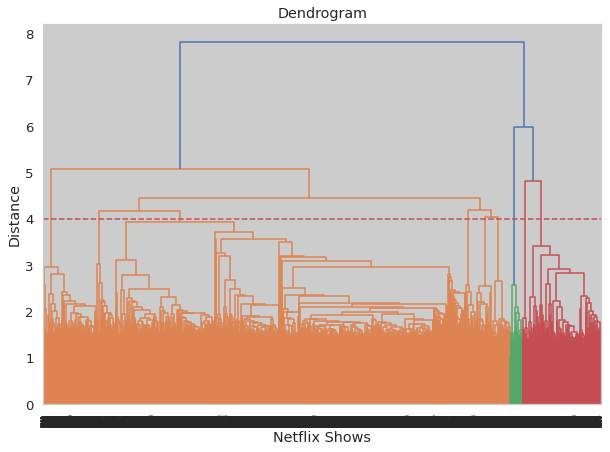

In [73]:
# Building a dendogram to decide the number of clusters
plt.figure(figsize=(10, 7))  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

At a distance of 4 units, 7 clusters can be built using the agglomerative clustering algorithm.

Building 7 clusters using the Agglomerative clustering algorithm:

In [74]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')  
hierarchical.fit_predict(X)
     

array([1, 1, 0, ..., 0, 1, 0])

In [75]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_
     

In [76]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

type                                title       director  \
1044  TV Show                            Bookmarks                  
1224    Movie                                Carol    Todd Haynes   
5993    Movie                          Taxi Ballad  Daniel Joseph   
733     Movie  Barbie & Her Sisters in a Pony Tale    Kyran Kelly   
3259  TV Show                      Justin Time GO!                  

                                                   cast  \
1044                                        Marley Dias   
1224  Cate Blanchett, Rooney Mara, Sarah Paulson, Ky...   
5993  Talal El-Jordi, Karina Logue, Badih Abou Chakr...   
733   Kelly Sheridan, Kazumi Evans, Claire Corlett, ...   
3259             Drew Davis, Scott McCord, Jenna Warren   

                                           country rating  \
1044                                 United States   TV-Y   
1224      United Kingdom, United States, Australia      R   
5993  Lebanon, United States, United Arab Emirates  TV-MA   
733                                  United States   TV-Y   
3259                                 United States   TV-Y   

                                  listed_in  \
1044                               Kids' TV   
1224  Dramas, LGBTQ Movies, Romantic Movies   
5993           Dramas, International Movies   
733                Children & Family Movies   
3259                               Kids' TV   

                                            description  hierarchical_cluster  
1044  Celebrity readers share children's books by Bl...                     0  
1224  In the 1950s, a glamorous married woman and an...                     0  
5993  A taxi driver new to Beirut forms an unlikely ...                     0  
733   Barbie and her sisters set off on a Swiss adve...                     0  
3259  A young boy's imagination takes him throughout...                     0

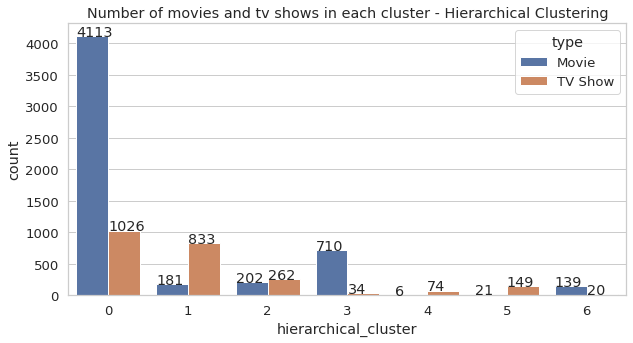

In [77]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')

# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

Successfully built 7 clusters using the Agglomerative (hierarchical) clustering algorithm.

**Building wordclouds for different clusters in hierarchical Clustering**

In [78]:
def hierarchical_worldcloud(cluster_number, column_name):
  
  '''function for Building a wordcloud for the movie/shows'''

  df_wordcloud = df[['hierarchical_cluster',column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['hierarchical_cluster']==cluster_number]
  
  # text documents
  text = " ".join(word for word in df_wordcloud[column_name])

  # create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="white").generate(text)
  
  # Generate a word cloud image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**Word Cloud on "title" column for different cluster**

cluster 0


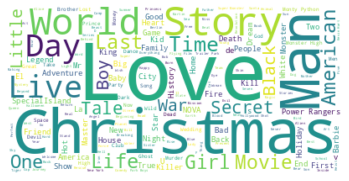

cluster 1


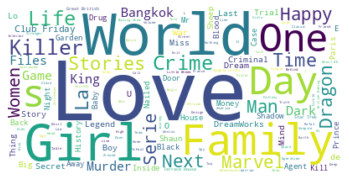

cluster 2


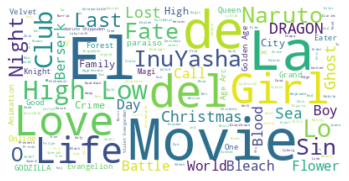

cluster 3


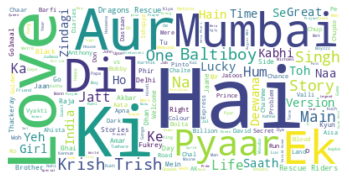

cluster 4


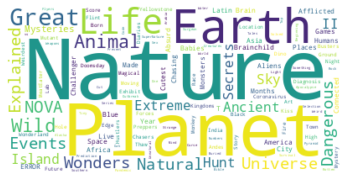

cluster 5


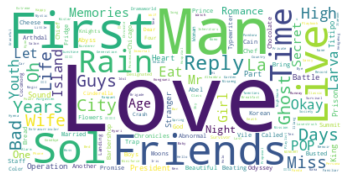

cluster 6


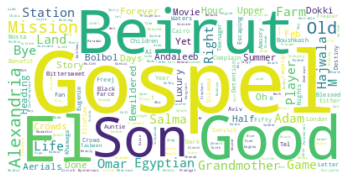

In [79]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'title')

**Word Cloud on "description" column for different cluster**

cluster 0


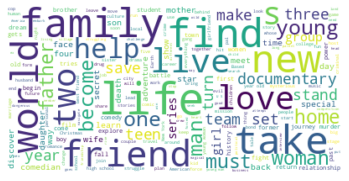

cluster 1


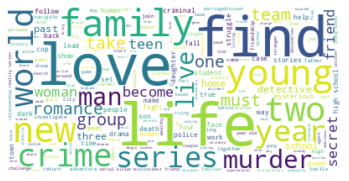

cluster 2


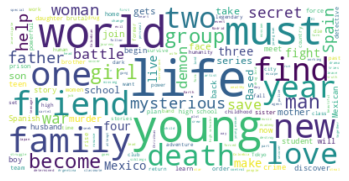

cluster 3


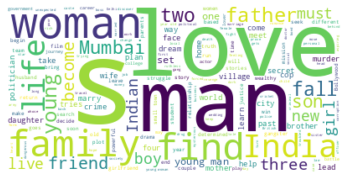

cluster 4


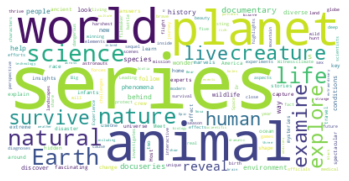

cluster 5


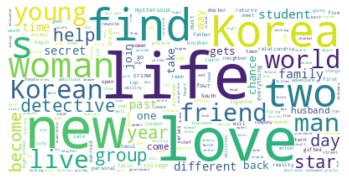

cluster 6


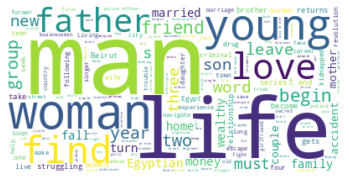

In [80]:
#description
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'description')

**Word Cloud on "cast" column for different cluster**

cluster 0


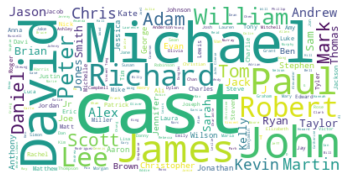

cluster 1


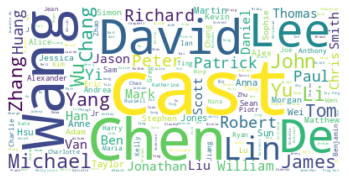

cluster 2


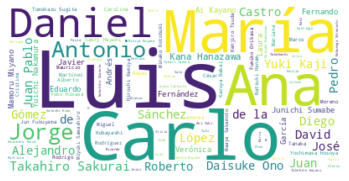

cluster 3


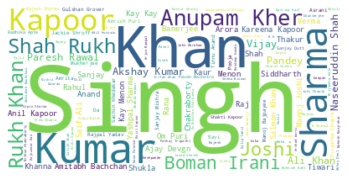

cluster 4


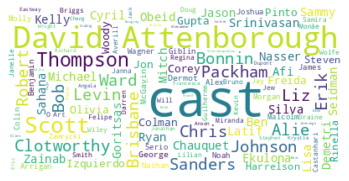

cluster 5


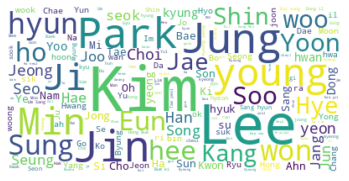

cluster 6


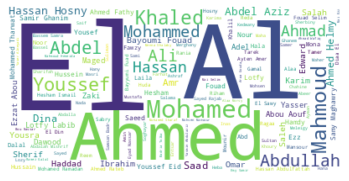

In [81]:
#cast
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'cast')

**Word Cloud on "country" column for different cluster**

cluster 0


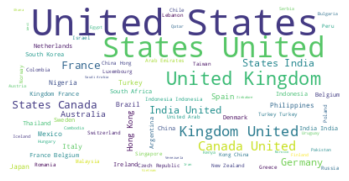

cluster 1


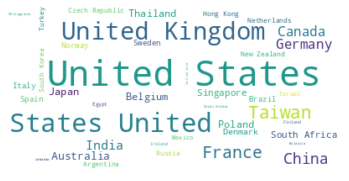

cluster 2


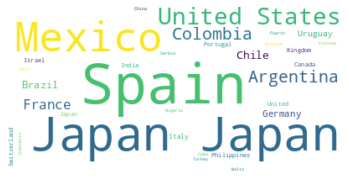

cluster 3


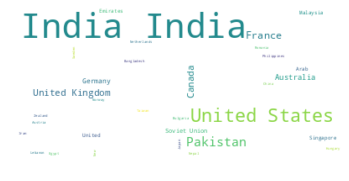

cluster 4


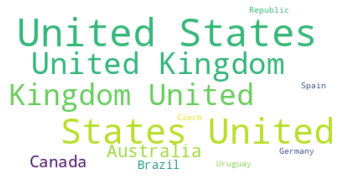

cluster 5


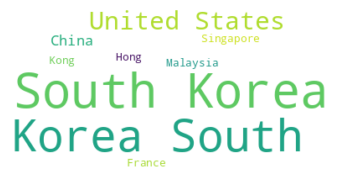

cluster 6


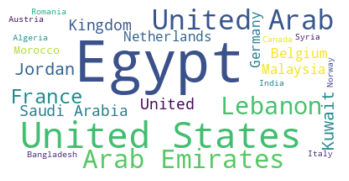

In [82]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'country')

**Word Cloud on "listed_in (genre)" column for different cluster**

cluster 0


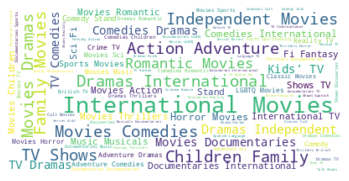

cluster 1


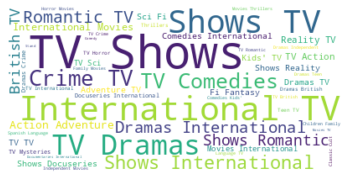

cluster 2


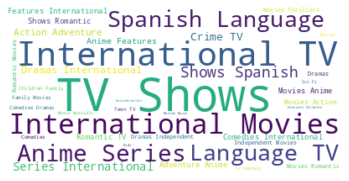

cluster 3


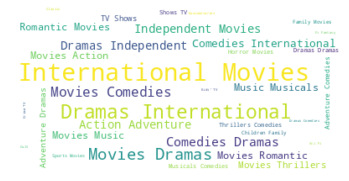

cluster 4


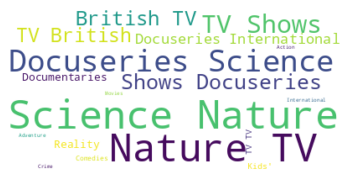

cluster 5


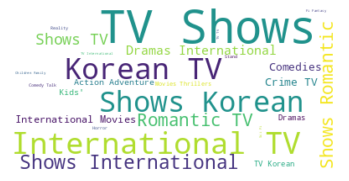

cluster 6


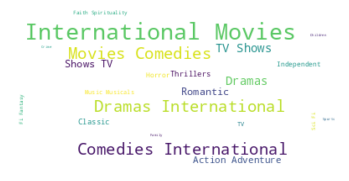

In [83]:
for i in range(7):
  print(f'cluster {i}')
  hierarchical_worldcloud(i,'listed_in')

**Content Based Recommendation System**

Content-based recommendation systems recommend items to a user by using the similarity of items. This recommender system recommends products or items based on their description or features. It identifies the similarity between the products based on their descriptions.

It short notes which items a particular user likes and also the items that the users with behavior and likings like him/her likes, to recommend items to that user.

We can build a simple content based recommender system based on the similarity of the movie/shows.
If a person has watched a show on Netflix, the recommender system must be able to recommend a list of similar shows that s/he likes.
To get the similarity score of the shows, we can use cosine similarity.
The similarity between two vectors (A and B) is calculated by taking the dot product of the two vectors and dividing it by the magnitude value. We can simply say that the cosine similarity score of two vectors increases as the angle between them decreases.

In [84]:
# veryfying index
df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7782   s7783                                     Zozo   
7783   s7784                                   Zubaan   
7784   s7785                        Zulu Man in Japan   
7785   s7786                    Zumbo's Just Desserts   
7786   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7782  lebanon civil war depriv zozo famili hes left ...  
7783  scrappi poor boy worm way tycoon dysfunct fami...  
7784  documentari south african rapper nasti c hit s...  
7785  dessert wizard adriano zumbo look next “willi ...  
7786  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

1.The dataframe under consideration has a total of 7770 rows. However, due to the removal of some rows containing null values, the last index shown in the dataframe is 7786.

2.To build a content-based recommendation system, we calculate the similarity score based on a specific index_id with respect to the corresponding "tags" column.

3.Failure to reset the index may result in the calculation of cosine similarity for a different index, leading to incorrect recommendations. Hence, resetting the index is essential to ensure that the recommendations are based on the correct index.

4.Resetting the index involves assigning a new sequential index to each row of the dataframe, starting from 0. This ensures that each row has a unique and identifiable index, making it easier to perform computations and obtain accurate results.

5.Therefore, resetting the index is a crucial step in building a content-based recommendation system, as it ensures that the recommendations are based on the correct index and leads to more accurate and relevant recommendations.

In [85]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly 
recommender_df[['show_id', 'title', 'tags']]

show_id                                    title  \
0         s1                                       3%   
1         s2                                     7:19   
2         s3                                    23:59   
3         s4                                        9   
4         s5                                       21   
...      ...                                      ...   
7765   s7783                                     Zozo   
7766   s7784                                   Zubaan   
7767   s7785                        Zulu Man in Japan   
7768   s7786                    Zumbo's Just Desserts   
7769   s7787  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

                                                   tags  
0     futur elit inhabit island paradis far crowd sl...  
1     devast earthquak hit mexico citi trap survivor...  
2     armi recruit found dead fellow soldier forc co...  
3     postapocalypt world ragdol robot hide fear dan...  
4     brilliant group student becom cardcount expert...  
...                                                 ...  
7765  lebanon civil war depriv zozo famili hes left ...  
7766  scrappi poor boy worm way tycoon dysfunct fami...  
7767  documentari south african rapper nasti c hit s...  
7768  dessert wizard adriano zumbo look next “willi ...  
7769  documentari delv mystiqu behind bluesrock trio...  

[7770 rows x 3 columns]

As you can see above dataframe We successfully reset the index. Now dataset is ready to build content based recommandation system

In [86]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [87]:
#Setting index
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zero'].index[0]}")  # index[0] --> to locate index position
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zero'].index[0]}")

before reset index id for movie 'Zero' : 7764
after reset index id for movie 'Zero': 7747


In [88]:
# calling out transformed array independent features created from tags(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.62770754e-01, -8.85380780e-03, -2.34244239e-02, ...,
         5.46237532e-03,  1.05890165e-04,  5.81973023e-03],
       [-4.51876579e-02, -9.27064344e-03,  1.31688188e-02, ...,
        -1.78595497e-03,  6.81948488e-03,  1.12747734e-03],
       [-4.39819888e-02, -4.74207488e-02, -3.34881492e-02, ...,
        -2.90471751e-04,  4.38134436e-03, -4.50691292e-03],
       ...,
       [-6.50688501e-02,  3.12716726e-02,  8.85613566e-02, ...,
         1.97491349e-02,  9.87748305e-04,  4.93552960e-03],
       [ 7.57150814e-02,  4.35981475e-02,  2.25945606e-02, ...,
        -8.96760576e-03,  1.23094066e-02, -1.03567519e-02],
       [-5.65400850e-02,  1.72672124e-01,  1.38299413e-01, ...,
        -5.78803565e-03, -7.40427943e-03, -2.68350735e-03]])

In [89]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08776614,  0.02326954, ..., -0.02524384,
         0.01094016, -0.02184533],
       [ 0.08776614,  1.        , -0.00430122, ...,  0.06972763,
        -0.00983306, -0.00915573],
       [ 0.02326954, -0.00430122,  1.        , ..., -0.00201134,
        -0.01135075, -0.01246755],
       ...,
       [-0.02524384,  0.06972763, -0.00201134, ...,  1.        ,
        -0.01505418,  0.05308061],
       [ 0.01094016, -0.00983306, -0.01135075, ..., -0.01505418,
         1.        ,  0.04592587],
       [-0.02184533, -0.00915573, -0.01246755, ...,  0.05308061,
         0.04592587,  1.        ]])

**Function for list down top 10 recommended movie on the basis of cosine similarity score.**

In [90]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])
    
    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [91]:
recommend('Naruto')

If you liked 'Naruto', you may also enjoy: 

Naruto Shippûden the Movie: Bonds
Naruto Shippuden: The Movie
Naruto Shippuden : Blood Prison
Naruto the Movie 2: Legend of the Stone of Gelel
Naruto Shippûden the Movie: The Will of Fire
Naruto the Movie 3: Guardians of the Crescent Moon Kingdom
Naruto Shippuden: The Movie: The Lost Tower
DRIFTING DRAGONS
Dino Girl Gauko
Marvel Anime: Wolverine


In [92]:
recommend('Our Planet')

If you liked 'Our Planet', you may also enjoy: 

Nature's Great Events: Diaries
Nature's Great Events (2009)
Nature's Weirdest Events
Blue Planet II
Planet Earth II
The Making of Frozen Planet
Life Story
Night on Earth
The Hunt
Moving Art


In [93]:
recommend('Phir Hera Pheri')

If you liked 'Phir Hera Pheri', you may also enjoy: 

Bhool Bhulaiyaa
Thank You
Golmaal: Fun Unlimited
Bhagam Bhag
Ready
Chup Chup Ke
Khushi
Life in a ... Metro
Hattrick
Hasee Toh Phasee


# **Conclusion**

Welcome to our exciting journey of exploring the world of Netflix shows! Our goal was to cluster the shows into groups based on their similarities and differences, ultimately creating a content-based recommender system that suggests 10 shows based on the user's viewing history.

With over 7787 records and 11 attributes, we began our adventure by delving into the dataset's missing values and performing exploratory data analysis (EDA). Our findings revealed that Netflix boasts more movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, we focused on six key attributes: director, cast, country, genre, rating, and description. We transformed these attributes into a 10000-feature TFIDF vectorization, then used Principal Component Analysis (PCA) to tackle the curse of dimensionality. By reducing the components to 3000, we were able to capture more than 80% of the variance.

Next, we used two clustering algorithms, K-Means and Agglomerative clustering, to group the shows. K-Means determined that the optimal number of clusters was 5, as confirmed by the elbow method and Silhouette score analysis. Meanwhile, Agglomerative clustering suggested 7 clusters, which we visualized using a dendrogram.

But we didn't stop there. We then created a content-based recommender system using the similarity matrix obtained through cosine similarity. This system provides personalized recommendations based on the type of show the user has watched, giving them 10 top-notch suggestions to explore.

Join us in discovering the diverse world of Netflix shows, and let our recommender system guide you to your next binge-worthy obsession.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***